# Problem Statement


This dataset is created for the prediction of Graduate admissions from an Indian perspective. The dataset contains various features that are important during the application for the Master's Program. The predicted output obtained from the classification algorithm gives a fair idea about the chances of a student for admission.

# About the dataset (Graduate admissions prediction data)

 Serial No.: Serial number of student

GRE Scores: GRE score (out of 340)

TOEFL Scores: TOEFL score (out of 120)

University Rating: University rating (out of 5)

SOP: Strength of Statement of Purpose (out of 5)

LOR: Strength of Letter of Recommendation (out of 5)

CGPA: Undergraduate CGPA (out of 10)

Research: Research experience (either 0 or 1)

Chance of Admit: Chance of admission (target/dependent variable)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Admission_Predict.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [5]:
data["Research"]=data["Research"].astype("object")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    object 
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB


In [7]:
data.skew()

Serial No.           0.000000
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit      0.201765
dtype: float64

In [8]:
data.drop("Serial No.",axis=1,inplace=True)

In [9]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [10]:
# split teh data for input and output
x=data.drop('Chance of Admit',1)
y=data['Chance of Admit']

In [11]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [12]:
datanum=x.select_dtypes(include=np.number)
datacat=x.select_dtypes(exclude=np.number)

In [13]:
datanum

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04
396,325,107,3,3.0,3.5,9.11
397,330,116,4,5.0,4.5,9.45
398,312,103,3,3.5,4.0,8.78


In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
datanum_sc=sc.fit_transform(datanum)
datanum_sc=pd.DataFrame(datanum_sc,columns=datanum.columns)
datanum_sc

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029
...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036


In [21]:
dummy=pd.get_dummies(datacat,drop_first=True)
dummy

,Research_1
0,1
1,1
2,1
3,1
4,0
...,...
395,1
396,1
397,1
398,0


In [22]:
datafinal=pd.concat([datanum_sc,dummy],axis=1)
datafinal

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0
...,...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592,1
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126,1
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006,1
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036,0


In [24]:
y.value_counts(normalize=True)

0    0.55
1    0.45
Name: Chance of Admit, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(datafinal,y,test_size=0.3,random_state=48,stratify=y)

In [26]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(280, 7)
(120, 7)
(280,)
(120,)


In [32]:
ytrain.value_counts(normalize=True)

0    0.55
1    0.45
Name: Chance of Admit, dtype: float64

In [33]:
ytest.value_counts(normalize=True)

0    0.55
1    0.45
Name: Chance of Admit, dtype: float64

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#Training the dat

lr.fit(xtrain,ytrain)

# predict the test data
ypred=lr.predict(xtest)

In [36]:
ypred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [37]:
ans=pd.DataFrame()
ans["Actual"]=ytest
ans["predicted"]=ypred
ans

,Actual,predicted
61,0,0
51,0,0
314,0,0
46,1,1
56,0,0
...,...,...
147,1,1
245,1,1
163,0,0
363,0,0


In [40]:
lr.predict_proba(xtest)

array([[9.36755822e-01, 6.32441782e-02],
       [9.86526476e-01, 1.34735241e-02],
       [9.61410982e-01, 3.85890181e-02],
       [1.00948475e-02, 9.89905152e-01],
       [9.96887984e-01, 3.11201626e-03],
       [6.64167829e-01, 3.35832171e-01],
       [7.19157935e-01, 2.80842065e-01],
       [9.26838478e-02, 9.07316152e-01],
       [3.05658287e-03, 9.96943417e-01],
       [1.77931361e-03, 9.98220686e-01],
       [9.86114856e-01, 1.38851438e-02],
       [9.36312300e-02, 9.06368770e-01],
       [5.80793997e-01, 4.19206003e-01],
       [9.98699954e-01, 1.30004617e-03],
       [9.99870731e-01, 1.29269455e-04],
       [3.42095828e-01, 6.57904172e-01],
       [9.94906779e-01, 5.09322071e-03],
       [3.68281810e-03, 9.96317182e-01],
       [9.12736220e-01, 8.72637798e-02],
       [4.87683569e-01, 5.12316431e-01],
       [8.46100433e-01, 1.53899567e-01],
       [9.21135668e-01, 7.88643320e-02],
       [9.83310796e-01, 1.66892038e-02],
       [5.41544956e-01, 4.58455044e-01],
       [7.903686

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(ytest,ypred)
print(cm)
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

[[61  5]
 [10 44]]
0.875
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        66
           1       0.90      0.81      0.85        54

    accuracy                           0.88       120
   macro avg       0.88      0.87      0.87       120
weighted avg       0.88      0.88      0.87       120



In [49]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [50]:
ypredknn=knn.predict(xtest)

In [51]:
cm=confusion_matrix(ytest,ypredknn)
print(cm)
print(accuracy_score(ytest,ypredknn))
print(classification_report(ytest,ypredknn))

[[58  8]
 [13 41]]
0.825
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        66
           1       0.84      0.76      0.80        54

    accuracy                           0.82       120
   macro avg       0.83      0.82      0.82       120
weighted avg       0.83      0.82      0.82       120



In [ ]:
# Choosing the K values

In [58]:
error_rate = []
#ytest=np.array(ytest)

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))
    

Text(0, 0.5, 'Error Rate')

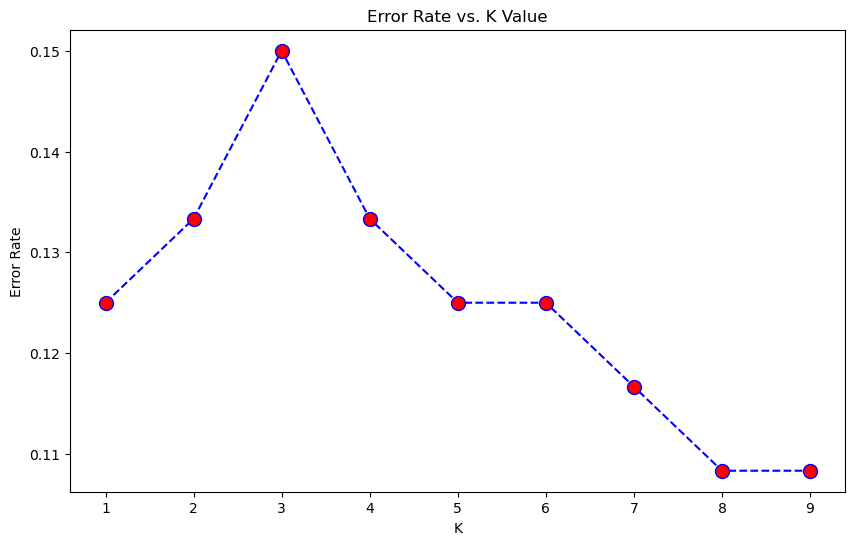

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [60]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

knn=KNeighborsClassifier()

params={'n_neighbors':np.arange(1,10)}

#kf=KFold(n_splits=3,shuffle=True,random_state=0)

GS=GridSearchCV(knn,params,cv=3,scoring='f1')

GS.fit(datafinal,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1')

In [61]:
GS.best_params_

{'n_neighbors': 9}

In [62]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(xtrain,ytrain)

GaussianNB()

In [64]:
ypredNB=NB.predict(xtest)

In [66]:
cm=confusion_matrix(ytest,ypredNB)
print(cm)
print(accuracy_score(ytest,ypredNB))
print(classification_report(ytest,ypredNB))

[[57  9]
 [ 4 50]]
0.8916666666666667
              precision    recall  f1-score   support

           0       0.93      0.86      0.90        66
           1       0.85      0.93      0.88        54

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.90      0.89      0.89       120

